Importing relevant libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

Load data

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# how big is our train and test data
x_test.shape

(10000, 28, 28)

In [4]:
x_train_full.shape

(60000, 28, 28)

In [5]:
# one instance

x_train_full[0]
# output gives one instance have 28 values or lengths of arrays and all of these arrrys have 28 numbers in them and

# each of the image pixels have a values go from 0 to 255 

# higher the number wider the pixel or image becomes whiter

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
x_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

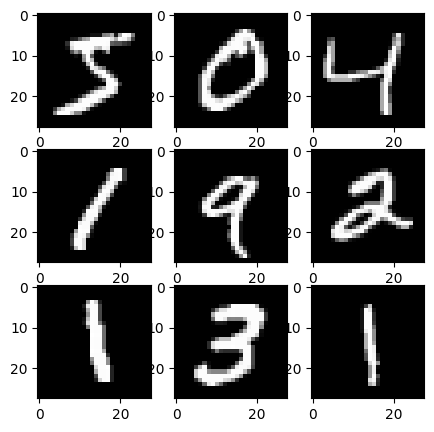

In [8]:
# creating the figure and showing the nine images
# its a easy task to figure out the numbers but we need to build neural networks to identify those numbers

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(5,5))
a = 0

for row in range(3):
    for col in range(3):
        axes[row,col].imshow(x_train_full[a], cmap=plt.get_cmap('gray'))
        a += 1
        
plt.show()

Normalize the values

In [9]:
# put all the inputs zero to one:
# just divide all values by 255
# and all value become between 0 to 1
# we are doing validation only for training datasets. for this creating validation dataset directly from data side which is
# import from keras is at training and testing dataset.
# the first 5000 validation datasets, put it aside and divide by 255
# we dont need to divide by 255 to y train values because they only goes from 0 to 9
# and we do the same thing with the test dataset becuase we need to lookm them same

x_valid, x_train = x_train_full[:5000] / 255, x_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test / 255

In [10]:
# check validation of one instance

x_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Define classes

In [12]:
# define class name to all the values with string values goes from 0 to 9

class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

In [13]:
class_names[y_train[0]]

'7'

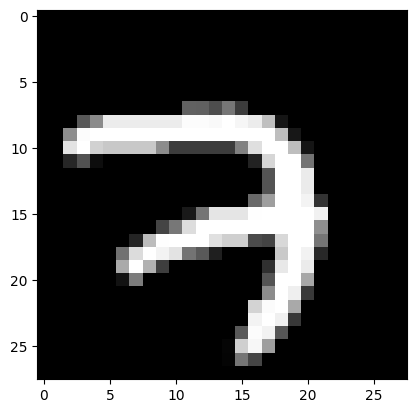

In [15]:
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))

Build neural net